# **MLFA LAb Test Question 1**

In [1]:
#Imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
#Use the last 5 digits of your roll number as the seed of the random number generator.
random.seed(30049)

In [2]:
#Question 1(A)
#Task: Choose a random 5D vector W, where the first dimension lies between (0,1), 2nd dimension between (1,2), 3rd between (2,3) etc.

W = np.asarray([random.uniform(0, 1),
     random.uniform(1, 2),
     random.uniform(2, 3),
     random.uniform(3, 4),
     random.uniform(4, 5)])
print(W)

[0.71631698 1.36615423 2.9133137  3.79626588 4.41853513]


In [3]:
#Question 1(B)
#Task: Use it to generate N=1000 data-points {Xi, Yi}, where Yi = W.Xi + ei, where Xi is a 5D feature vector 
#where each feature is uniformly between (-10, 10) and ei is a random value between -1 and 1.

N=1000
dataset = list()
for i in range(0, N):
  X = np.asarray([random.uniform(-10,10), random.uniform(-10,10), random.uniform(-10,10), random.uniform(-10,10), random.uniform(-10,10)])
  e = random.uniform(-1,1)
  Y = np.dot(W.T,X) + e
  dataset.append([X, Y])
print(len(dataset))

1000


In [4]:
#Question 1(C)
#Task: Fit a linear regression model on (Xi, Yi) and estimate W1. 

# extract features X and targets Y from data
X = [d[0] for d in dataset]
Y = [d[1] for d in dataset]

# fit linear regression model
lr = LinearRegression()
model = lr.fit(X, Y)

# get estimated coefficients (including intercept)
# W1 = np.asarray([model.intercept_] + list(model.coef_))
W1 = np.asarray(list(model.coef_)) #not considering bias as it would lead to 6D vector and e is not included in W

print("Estimated value of W1:", W1)

Estimated value of W1: [0.71230276 1.36430493 2.91569462 3.79710681 4.42118946]


In [5]:
#Question 1(D)
#Task: Calculate the estimation error ||W-W1||2 and the MSE (1/N)*∑(Yi-W1.Xi)2

# calculate ||W-W1||_2
error_norm = np.linalg.norm(W - W1)
print("Estimation error ||W-W1||_2:", error_norm)

# calculate MSE
Ypred = model.predict(X)
MSE = np.mean((Y - Ypred)**2)
print("Mean Squared Error:", MSE)

Estimation error ||W-W1||_2: 0.005740665948707409
Mean Squared Error: 0.33200311788998005


In [6]:
#Question 1(E)
#Task: Fit a LASSO regression model on (Xi, Yi) and estimate W2 for different values of λ (1 to 20).

from sklearn.linear_model import Lasso

# set up LASSO models for different values of lambda
lambda_vals = list(range(1, 21))
W2_est = list()
for lam in lambda_vals:
    lasso_model = Lasso(alpha=lam).fit(X, Y)
    W2 = np.asarray(list(lasso_model.coef_))
    W2_est.append(W2)

# print estimated values of W2 for different lambda values
for i, lam in enumerate(lambda_vals):
    print(f"Lambda = {lam}: Estimated values of W2:", W2_est[i])

Lambda = 1: Estimated values of W2: [0.68343745 1.33317431 2.88547701 3.76839719 4.39136651]
Lambda = 2: Estimated values of W2: [0.654572   1.30204372 2.85525941 3.73968758 4.36154357]
Lambda = 3: Estimated values of W2: [0.62570656 1.27091314 2.82504181 3.71097796 4.33172062]
Lambda = 4: Estimated values of W2: [0.59684111 1.23978256 2.79482421 3.68226835 4.30189768]
Lambda = 5: Estimated values of W2: [0.56797567 1.20865198 2.76460661 3.65355873 4.27207473]
Lambda = 6: Estimated values of W2: [0.53911022 1.1775214  2.734389   3.62484911 4.24225179]
Lambda = 7: Estimated values of W2: [0.51024478 1.14639082 2.7041714  3.5961395  4.21242884]
Lambda = 8: Estimated values of W2: [0.48137933 1.11526024 2.6739538  3.56742988 4.1826059 ]
Lambda = 9: Estimated values of W2: [0.45251389 1.08412966 2.6437362  3.53872027 4.15278296]
Lambda = 10: Estimated values of W2: [0.42364845 1.05299908 2.61351859 3.51001065 4.12296001]
Lambda = 11: Estimated values of W2: [0.394783   1.0218685  2.5833009

In [7]:
#Question 1(F)
#Task: Sparsify each W2 to obtain W3 by setting all values below a certain threshold to 0 (you can choose the threshold). Plot the MSE (1/N)*∑(Yi-W3.Xi)2 as a function of λ.

# set a threshold for sparsity
threshold = 0.5

# sparsify each W2 to obtain W3
W3_est = []
for i in range(len(lambda_vals)):
    W2 = W2_est[i]
    # W3 = [W2[0]] + [0 if abs(val) < threshold else val for val in W2[1:]]
    W3 = [0 if abs(val) < threshold else val for val in W2]
    W3_est.append(W3)
  

MSE_lambda_vals = []
for i in range(len(lambda_vals)):
  W3 = np.asarray(W3_est[i])
  mse_vals = list()
  for j in range(0,N):
    Ypred = np.dot(W3.T, X[j])
    err = (Y[j]-Ypred)**2
    mse_vals.append(err)
  mse_vals = np.asarray(mse_vals)
  MSE_lambda_vals.append(np.mean(mse_vals))

Text(0, 0.5, 'MSE')

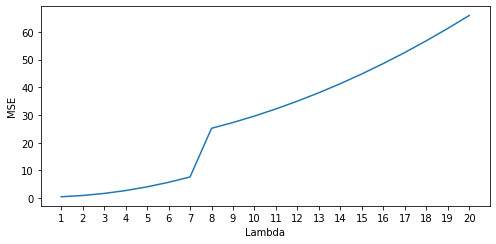

In [8]:
# plot results
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
x = lambda_vals
y = MSE_lambda_vals
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)
plt.xticks(default_x_ticks, x)
plt.xlabel("Lambda")
plt.ylabel("MSE")